In [46]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

In [2]:
df = pd.read_csv('data/data.csv', skiprows=4, index_col='Year')

In [3]:
pd.index = pd.to_datetime(df.index, format="%Y")

In [4]:
df

,Anomaly
Year,
1851,-0.59
1852,-0.50
1853,-0.22
1854,-0.58
1855,-0.64
...,...
2021,1.23
2022,1.16
2023,1.07


In [5]:
stat = adfuller(df)

In [6]:
stat

(1.2602967301158106,
 0.9963771133594109,
 6,
 168,
 {'1%': -3.4698858990744115,
  '5%': -2.8789026251889647,
  '10%': -2.5760266680839004},
 -52.62198937825508)

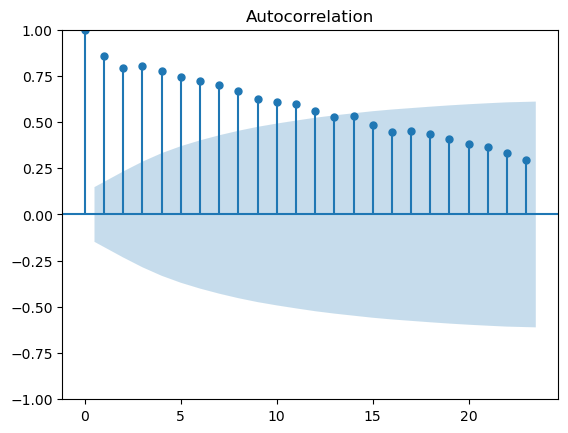

In [7]:
plot_acf(df);

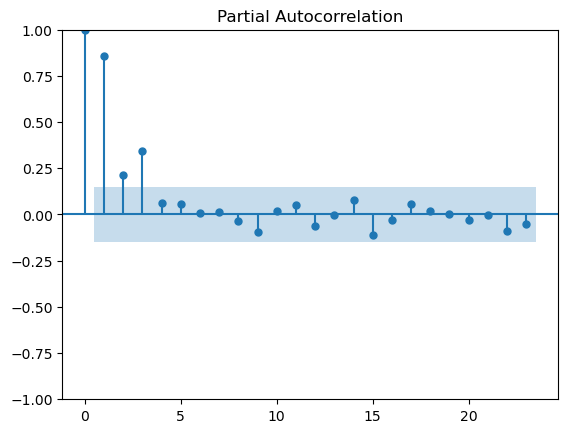

In [8]:
plot_pacf(df);

<Axes: xlabel='Year'>

<Figure size 1000x600 with 0 Axes>

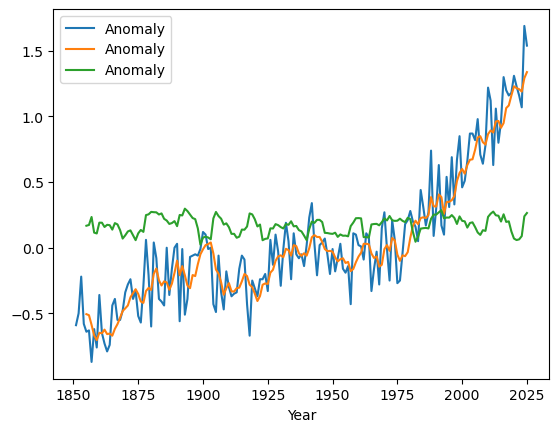

In [9]:
plt.figure(figsize=(10, 6))
ax = df.plot()
df.rolling(window=5).mean().plot(ax=ax)
df.rolling(window=5).std().plot(ax=ax)

In [10]:
adfuller(df.diff().dropna())

(-8.66173377687122,
 4.802090283362318e-14,
 5,
 168,
 {'1%': -3.4698858990744115,
  '5%': -2.8789026251889647,
  '10%': -2.5760266680839004},
 -52.75815635439744)

In [11]:
df["stat_ana"] = df.diff()

In [12]:
df.head()

,Anomaly,stat_ana
Year,,
1851,-0.59,NaN
1852,-0.50,0.09
1853,-0.22,0.28
1854,-0.58,-0.36
1855,-0.64,-0.06


<Axes: xlabel='Year'>

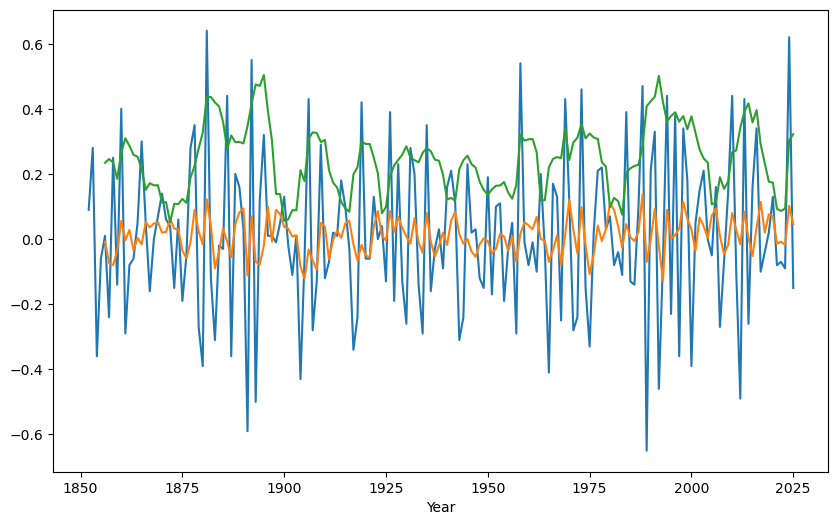

In [13]:
plt.figure(figsize=(10, 6))
ax = df["stat_ana"].plot()
df["stat_ana"].rolling(window=5).mean().plot(ax=ax)
df["stat_ana"].rolling(window=5).std().plot(ax=ax)

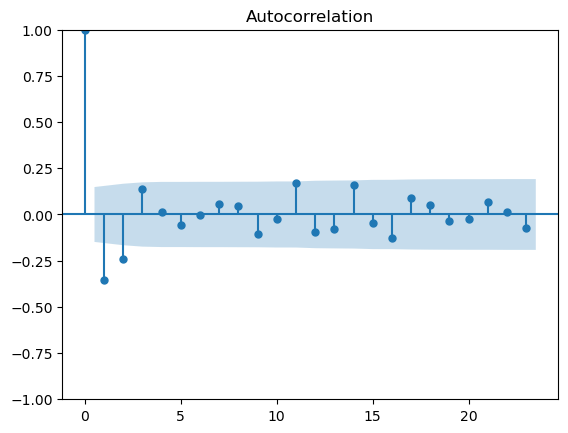

In [14]:
plot_acf(df["stat_ana"][1:]);

In [15]:
train = df[1:int(len(df)*0.8)]
test = df[int(len(df)*0.8):]

In [16]:
temp_arima = ARIMA(train["stat_ana"], order=(5,0,2))
temp_arima_fit = temp_arima.fit()

C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\statsmodels\tsa\statespace\sarima

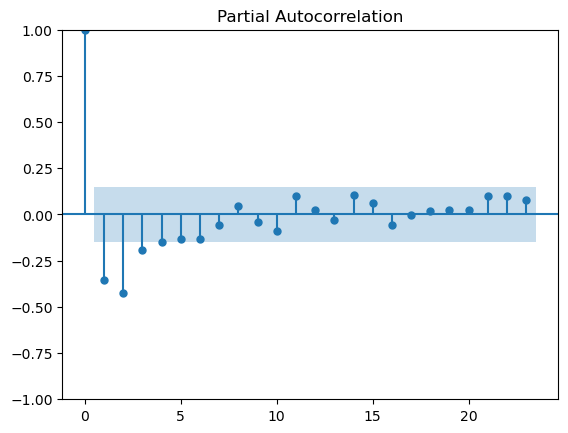

In [17]:
plot_pacf(df["stat_ana"][1:]);

In [18]:
temp_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               stat_ana   No. Observations:                  139
Model:                 ARIMA(5, 0, 2)   Log Likelihood                  32.608
Date:                Tue, 13 May 2025   AIC                            -47.216
Time:                        18:25:27   BIC                            -20.806
Sample:                             0   HQIC                           -36.484
                                - 139                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.003      2.024      0.043       0.000       0.012
ar.L1         -0.6495      3.411     -0.190      0.849      -7.335       6.036
ar.L2          0.0456      0.711      0.064      0.949      -1.347       1.439
ar.L3          0.0069      0.418      0.016      0.987      -0.813       0.826
ar.L4          0.1290      0.422      0.306      0.760      -0.698       0.955
ar.L5          0.0258      0.214      0.121      0.904      -0.394       0.446
ma.L1         -0.0171      3.396     -0.005      0.996      -6.674       6.639
ma.L2         -0.7291      2.959     -0.246      0.805      -6.528       5.070
sigma2         0.0364      0.005      6.978      0.000       0.026       0.047
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.98   Prob(JB):                         0.67
Heteroskedasticity (H):               0.80   Skew:                            -0.10
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
forecast = temp_arima_fit.forecast(steps = len(test["stat_ana"])) 

C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
print(mean_squared_error(test["stat_ana"], forecast))
print(mean_absolute_error(test["stat_ana"], forecast))
print(mean_absolute_percentage_error(test["stat_ana"], forecast))

0.0714307321752351
0.21786880823708424
929427065080.0513


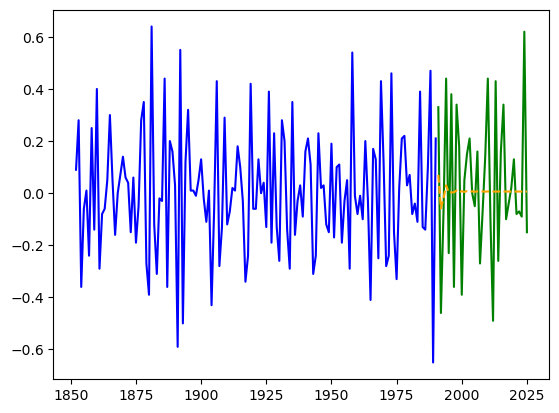

In [21]:
plt.plot(train.index, train["stat_ana"], label='Train', color='blue')
plt.plot(test.index, test["stat_ana"], label='Actual', color='green')
plt.plot(test.index, forecast, label='Forecast', color='orange', linestyle='--')

In [22]:
glob_temp = RandomForestRegressor()

In [25]:
rf_data = pd.DataFrame(df["Anomaly"])
for i in range(1,6):
    rf_data[f"lag_{i}"] = rf_data["Anomaly"].shift(i)
rf_data.dropna(inplace=True)

In [26]:
rf_data

,Anomaly,lag_1,lag_2,lag_3,lag_4,lag_5
Year,,,,,,
1856,-0.63,-0.64,-0.58,-0.22,-0.50,-0.59
1857,-0.87,-0.63,-0.64,-0.58,-0.22,-0.50
1858,-0.62,-0.87,-0.63,-0.64,-0.58,-0.22
1859,-0.76,-0.62,-0.87,-0.63,-0.64,-0.58
1860,-0.36,-0.76,-0.62,-0.87,-0.63,-0.64
...,...,...,...,...,...,...
2021,1.23,1.31,1.18,1.16,1.20,1.30
2022,1.16,1.23,1.31,1.18,1.16,1.20
2023,1.07,1.16,1.23,1.31,1.18,1.16


In [29]:
X = rf_data.drop(columns="Anomaly")
y = rf_data["Anomaly"]

In [30]:
X_train, X_test = rf_data[1:int(len(df)*0.8)], rf_data[int(len(df)*0.8):]
y_train, y_test = rf_data[1:int(len(df)*0.8)], rf_data[int(len(df)*0.8):]

In [31]:
glob_temp.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
pred_rf = glob_temp.predict(X_test)

In [33]:
mean_absolute_error(pred_rf, y_test)

0.5357855555555555

In [34]:
mean_absolute_percentage_error(pred_rf, y_test)

1.6247580174810092

In [35]:
mean_squared_error(pred_rf, y_test)

0.37365367422222207

In [37]:
xgb_data = XGBRegressor()

In [38]:
xgb_data.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
predict_xgb = xgb_data.predict(X_test)

In [43]:
mean_absolute_error(predict_xgb, y_test)

0.21948306262493134

In [44]:
mean_absolute_percentage_error(predict_xgb, y_test)

0.31301918625831604

In [45]:
mean_squared_error(predict_xgb, y_test)

0.09077765792608261

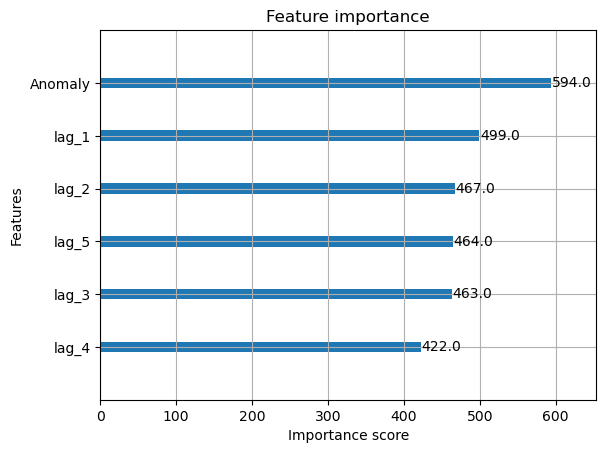

In [48]:
xgb.plot_importance(xgb_data);